<a href="https://colab.research.google.com/github/muhammadtaimoor9583/Deep-Learning/blob/main/handwritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
X_train = X_train/255
X_test = X_test/255

In [5]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [8]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8578 - loss: 0.4963 - val_accuracy: 0.9595 - val_loss: 0.1411
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9651 - loss: 0.1200 - val_accuracy: 0.9657 - val_loss: 0.1170
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9762 - loss: 0.0805 - val_accuracy: 0.9682 - val_loss: 0.1079
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9836 - loss: 0.0559 - val_accuracy: 0.9712 - val_loss: 0.0947
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9870 - loss: 0.0417 - val_accuracy: 0.9713 - val_loss: 0.1067
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9898 - loss: 0.0339 - val_accuracy: 0.9747 - val_loss: 0.0982
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9915 - loss: 0.0250 - val_accuracy: 0.9756 - val_loss: 0.0925
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9942 - loss: 0.0193 

In [9]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [10]:
y_pred = y_prob.argmax(axis = 1)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9767

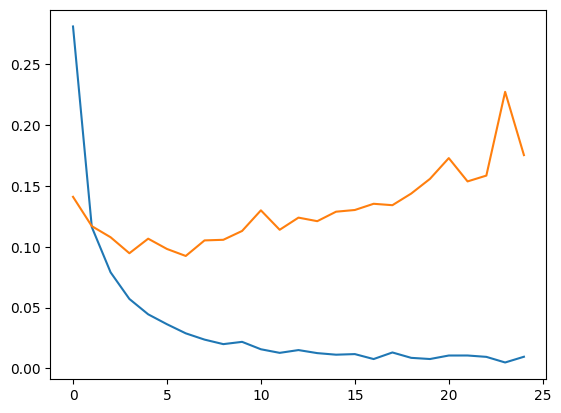

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

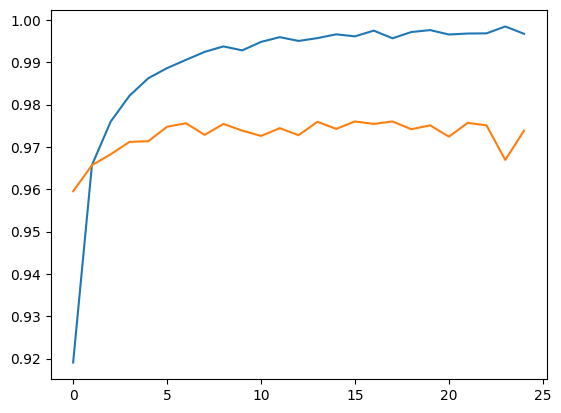

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

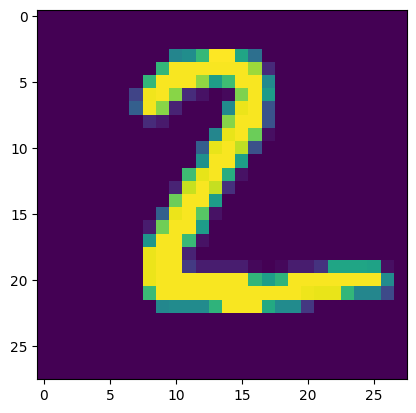

In [15]:
plt.imshow(X_test[1])

In [16]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([2])